In [14]:
import pandas as pd

df = pd.read_json('transaction-data-adhoc-analysis.json')
df['date'] = pd.to_datetime(df['transaction_date'])
df['date'] = df['date'].dt.strftime('%Y-%m')

In [15]:
#create subtables for each month
jan = df[df['date'] == '2022-01']
feb = df[df['date'] == '2022-02']
march = df[df['date'] == '2022-03']
april = df[df['date'] == '2022-04']
may = df[df['date'] == '2022-05']
june = df[df['date'] == '2022-06']

In [28]:
import re
from collections import Counter

def quantity_of_items(str):
    list = str.split(";")
    products = []
    for i in range(len(list)):
        list[i] = ",".join(reversed(list[i].split(",")))
        temp = re.findall(r'\d+', list[i][:4])
        quantity = int(''.join(temp))
        for j in range(len(list[i].split(","))-1):
            if j >= 1:
                for k in range(quantity):
                    products.append(list[i].split(",")[j+1] + ", " + list[i].split(",")[j])
                    k = k + 1
                k = 0
#counts how many duplicates 
    productsQuantity = {i:products.count(i) for i in products}
    return productsQuantity

#January
trans_items = jan["transaction_items"].values.tolist()
dict1 = {}
for i in range(len(trans_items)):
    x = quantity_of_items(trans_items[i])
    dict1 = Counter(x) + Counter(dict1)
    
df1 = pd.DataFrame()
df1['Items'] = dict1.keys()
df1['Quantity'] = dict1.values()
df1 = df1.sort_values("Items", ascending = True, ignore_index = True)

#February
trans_items = feb["transaction_items"].values.tolist()
dict1 = {}
for i in range(len(trans_items)):
    x = quantity_of_items(trans_items[i])
    dict1 = Counter(x) + Counter(dict1)
    
df2 = pd.DataFrame()
df2['Items'] = dict1.keys()
df2['Quantity'] = dict1.values()
df2 = df2.sort_values("Items", ascending = True, ignore_index = True)

#March
trans_items = march["transaction_items"].values.tolist()
dict1 = {}
for i in range(len(trans_items)):
    x = quantity_of_items(trans_items[i])
    dict1 = Counter(x) + Counter(dict1)
    
df3 = pd.DataFrame()
df3['Items'] = dict1.keys()
df3['Quantity'] = dict1.values()
df3 = df3.sort_values("Items", ascending = True, ignore_index = True)

#April
trans_items = april["transaction_items"].values.tolist()
dict1 = {}
for i in range(len(trans_items)):
    x = quantity_of_items(trans_items[i])
    dict1 = Counter(x) + Counter(dict1)
    
df4 = pd.DataFrame()
df4['Items'] = dict1.keys()
df4['Quantity'] = dict1.values()
df4 = df4.sort_values("Items", ascending = True, ignore_index = True)

#May
trans_items = may["transaction_items"].values.tolist()
dict1 = {}
for i in range(len(trans_items)):
    x = quantity_of_items(trans_items[i])
    dict1 = Counter(x) + Counter(dict1)
    
df5 = pd.DataFrame()
df5['Items'] = dict1.keys()
df5['Quantity'] = dict1.values()
df5 = df5.sort_values("Items", ascending = True, ignore_index = True)

#June
trans_items = june["transaction_items"].values.tolist()
dict1 = {}
for i in range(len(trans_items)):
    x = quantity_of_items(trans_items[i])
    dict1 = Counter(x) + Counter(dict1)
    
df6 = pd.DataFrame()
df6['Items'] = dict1.keys()
df6['Quantity'] = dict1.values()
df6 = df6.sort_values("Items", ascending = True, ignore_index = True)

In [29]:
sales = pd.DataFrame()
sales['Items']= df1['Items']
sales['January']= df1['Quantity']
sales['February']= df2['Quantity']
sales['March']= df3['Quantity']
sales['April']= df4['Quantity']
sales['May']= df5['Quantity']
sales['June']= df6['Quantity']

sales = sales.set_index('Items')
sales

,January,February,March,April,May,June
Items,,,,,,
"Candy City, Gummy Worms",9559,9996,9986,10043,9801,9934
"Candy City, Orange Beans",9774,10037,9611,9914,9964,10106
"Exotic Extras, Beef Chicharon",9665,10001,9816,9890,10028,9902
"Exotic Extras, Kimchi and Seaweed",9676,9949,9967,9921,9773,10104
"HealthyKid 3+, Gummy Vitamins",9681,9980,10145,9842,9948,9980
"HealthyKid 3+, Nutrional Milk",9727,9691,9876,9786,9881,9767
"HealthyKid 3+, Yummy Vegetables",9959,10256,9896,9861,9735,9722


In [32]:
janSales = jan["transaction_value"].values.sum()
febSales = feb["transaction_value"].values.sum()
marSales = march["transaction_value"].values.sum()
aprSales = april["transaction_value"].values.sum()
maySales = may["transaction_value"].values.sum()
junSales = june["transaction_value"].values.sum()

months = ["January", "February", "March", "April", "May", "June"]
salesPerMonth = janSales, febSales, marSales, aprSales, maySales, junSales 
saleValue = pd.DataFrame()
saleValue ["Months"] = months
saleValue ["Transaction Value"] = salesPerMonth
saleValue = saleValue.set_index('Months')
saleValue.T

Months,January,February,March,April,May,June
Transaction Value,62522565,63820403,63943846,63420965,63740675,63704318


<AxesSubplot:title={'center':'Sales Per Month'}, xlabel='Months'>

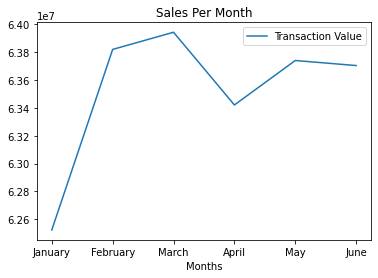

In [34]:
saleValue.plot(kind = 'line', title = 'Sales Per Month')